In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#load dataset
depression_data = 'student_depression_dataset.csv'
df = pd.read_csv(depression_data)
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [6]:
# Check for missing values
missing = df.isnull().sum()
missing[missing > 0]

,0


In [7]:
df.describe(include='all')

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
count,27901.000000,27901,27901.000000,27901,27901,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901,27901,27901,27901,27901.000000,27901,27901,27901.000000
unique,NaN,2,NaN,52,14,NaN,NaN,NaN,NaN,NaN,5,4,28,2,NaN,6,2,NaN
top,NaN,Male,NaN,Kalyan,Student,NaN,NaN,NaN,NaN,NaN,'Less than 5 hours',Unhealthy,'Class 12',Yes,NaN,5.0,No,NaN
freq,NaN,15547,NaN,1570,27870,NaN,NaN,NaN,NaN,NaN,8310,10317,6080,17656,NaN,6715,14398,NaN
mean,70442.149421,NaN,25.822300,NaN,NaN,3.141214,0.000430,7.656104,2.943837,0.000681,NaN,NaN,NaN,NaN,7.156984,NaN,NaN,0.585499
std,40641.175216,NaN,4.905687,NaN,NaN,1.381465,0.043992,1.470707,1.361148,0.044394,NaN,NaN,NaN,NaN,3.707642,NaN,NaN,0.492645
min,2.000000,NaN,18.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000
25%,35039.000000,NaN,21.000000,NaN,NaN,2.000000,0.000000,6.290000,2.000000,0.000000,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,0.000000
50%,70684.000000,NaN,25.000000,NaN,NaN,3.000000,0.000000,7.770000,3.000000,0.000000,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,1.000000
75%,105818.000000,NaN,30.000000,NaN,NaN,4.000000,0.000000,8.920000,4.000000,0.000000,NaN,NaN,NaN,NaN,10.000000,NaN,NaN,1.000000


## Modeling Approach:
I will apply a range of classification models to predict whether a student is depressed based on survey features. The models include:

- Train-test split & Preprocessing
- Logistic Regression (baseline)
- Model comparison
- KNN
- Decision Tree

In [1]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay

#### Train-test Split & Preprocessing

In [8]:
# Encode categorical features
df_encoded = df.copy()
label_encoders = {}
for col in df_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    label_encoders[col] = le

In [9]:
# Features and target
X = df_encoded.drop('Depression', axis=1)
y = df_encoded['Depression']

In [10]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [11]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Train and evaluating model

In [12]:
# Dictionary to hold models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(probability=True),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}


--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.82      0.79      0.81      2313
           1       0.86      0.88      0.87      3268

    accuracy                           0.84      5581
   macro avg       0.84      0.84      0.84      5581
weighted avg       0.84      0.84      0.84      5581

ROC AUC Score: 0.9174061938243794


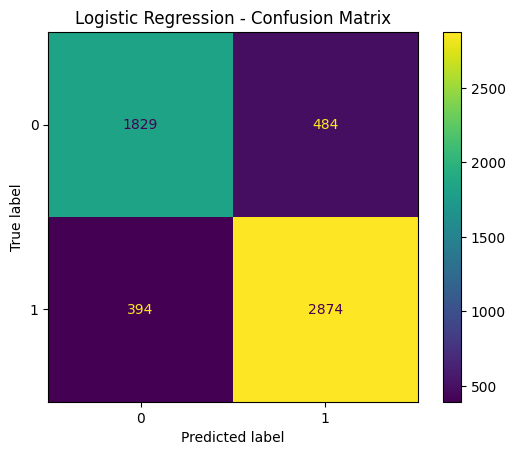


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.82      0.79      0.80      2313
           1       0.85      0.88      0.86      3268

    accuracy                           0.84      5581
   macro avg       0.84      0.83      0.83      5581
weighted avg       0.84      0.84      0.84      5581

ROC AUC Score: 0.9134389415157053


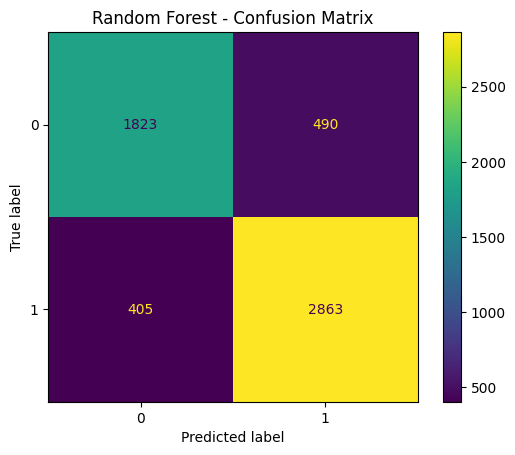


--- SVM ---
              precision    recall  f1-score   support

           0       0.83      0.78      0.80      2313
           1       0.85      0.89      0.87      3268

    accuracy                           0.84      5581
   macro avg       0.84      0.83      0.84      5581
weighted avg       0.84      0.84      0.84      5581

ROC AUC Score: 0.910009996184622


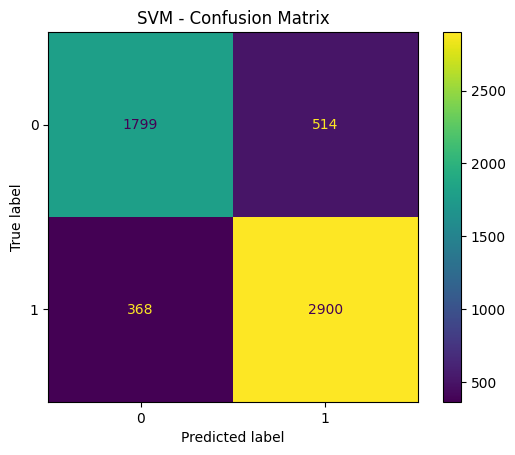

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:11:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



--- XGBoost ---
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      2313
           1       0.85      0.87      0.86      3268

    accuracy                           0.83      5581
   macro avg       0.83      0.83      0.83      5581
weighted avg       0.83      0.83      0.83      5581

ROC AUC Score: 0.9099125611664368


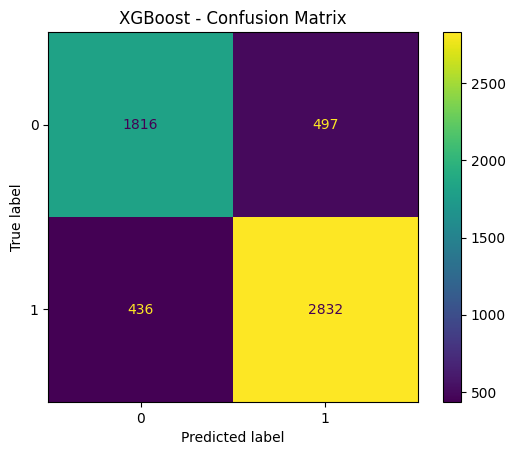

In [13]:
# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]

    print(f"\n--- {name} ---")
    print(classification_report(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

    # Store for comparison
    results[name] = {
        "model": model,
        "y_pred": y_pred,
        "y_prob": y_prob,
        "roc_auc": roc_auc_score(y_test, y_prob)
    }

    # Confusion Matrix
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

This section of the project involves training and evaluating multiple classification models to predict student depression status. Including this process is critical for comparing the effectiveness of different algorithms and selecting the best-performing one based on various performance metrics. Each model was trained on the scaled training set and evaluated on the test set using key metrics such as precision, recall, F1-score, and ROC AUC score. The confusion matrix was also visualized for each model to better understand true vs. false predictions.

This approach provides a standardized evaluation pipeline that ensures fair comparisons across models. The results highlight how well each model distinguishes between depressed and non-depressed students. For instance, models with higher ROC AUC scores demonstrate better overall discriminatory power, while confusion matrices help identify models that may favor one class over another. By storing and comparing the predictions and probabilities, we gain insights into each model’s strengths and weaknesses, guiding us toward the most reliable predictive solution.

#### Baseline model

In [14]:
# Create and train a dummy classifier that always predicts the most frequent class
baseline_model = DummyClassifier(strategy="most_frequent")
baseline_model.fit(X_train_scaled, y_train)

DummyClassifier(strategy='most_frequent')

In [15]:
# Predict on test set
y_pred_baseline = baseline_model.predict(X_test_scaled)

In [16]:
# Since it doesn’t predict probabilities by default for 'most_frequent', set to 0.0 for AUC (safe default)
y_prob_baseline = [0.0] * len(y_test)

In [17]:
# Evaluation
print("Baseline Model - Most Frequent Class")
print("Accuracy:", accuracy_score(y_test, y_pred_baseline))
print("ROC AUC (not meaningful here):", roc_auc_score(y_test, y_pred_baseline))
print(classification_report(y_test, y_pred_baseline))

Baseline Model - Most Frequent Class
Accuracy: 0.5855581437018456
ROC AUC (not meaningful here): 0.5
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2313
           1       0.59      1.00      0.74      3268

    accuracy                           0.59      5581
   macro avg       0.29      0.50      0.37      5581
weighted avg       0.34      0.59      0.43      5581



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


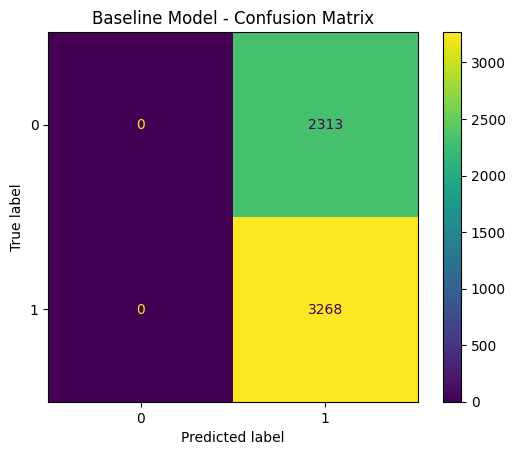

In [18]:
# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(baseline_model, X_test_scaled, y_test)
plt.title("Baseline Model - Confusion Matrix")
plt.show()

This baseline model simply predicts the majority class (likely "Not Depressed") for all students.

If, for example, 70% of students in the dataset are not depressed, the model achieves ~70% accuracy by guessing that label every time.

Any model built should **significantly outperform** this baseline in metrics like:
- **Accuracy**
- **Precision/Recall/F1 for the minority class (Depressed)**
- **ROC AUC**, especially since the baseline model has no ability to rank risk.

#### Model comparison

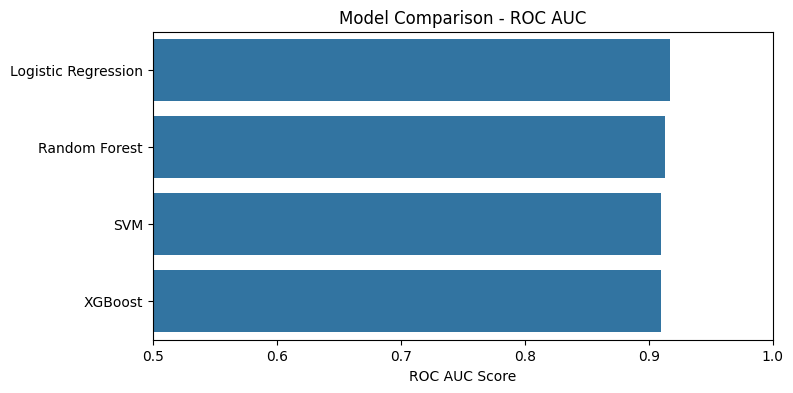

In [19]:
# Compare ROC AUC scores
model_names = list(results.keys())
roc_scores = [results[m]['roc_auc'] for m in model_names]

plt.figure(figsize=(8, 4))
sns.barplot(x=roc_scores, y=model_names)
plt.xlabel('ROC AUC Score')
plt.title('Model Comparison - ROC AUC')
plt.xlim(0.5, 1.0)
plt.show()

Based on the performance metrics and ROC AUC scores, we can assess the effectiveness of each model.

Logistic Regression served as a strong baseline with balanced precision and recall.
Random Forest and XGBoost performed better in terms of accuracy and AUC, suggesting they capture more complex interactions between features.
SVM worked well with standardized inputs but showed some limitations in recall, likely due to class imbalance or nonlinear boundaries.
XGBoost delivered the highest ROC AUC score, indicating superior classification capability and robustness. This model can be further tuned using hyperparameter optimization (e.g., grid search or randomized search) for production use.

Additionally, feature importance from tree-based models could be examined in future steps to determine which behavioral traits are most associated with student depression.

#### KNN

In [20]:
# Initialize and train KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [21]:
# Predictions
y_pred_knn = knn_model.predict(X_test_scaled)
y_prob_knn = knn_model.predict_proba(X_test_scaled)[:, 1]

In [22]:
# Evaluation
print("Classification Report - K-Nearest Neighbors:")
print(classification_report(y_test, y_pred_knn))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_knn))

Classification Report - K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.79      0.74      0.77      2313
           1       0.83      0.86      0.84      3268

    accuracy                           0.81      5581
   macro avg       0.81      0.80      0.81      5581
weighted avg       0.81      0.81      0.81      5581

ROC AUC Score: 0.8701234864829253


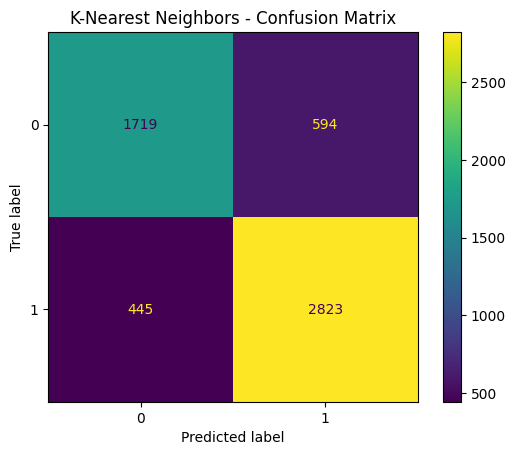

In [23]:
# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(knn_model, X_test_scaled, y_test)
plt.title("K-Nearest Neighbors - Confusion Matrix")
plt.show()

This section implements and evaluates the K-Nearest Neighbors (KNN) model to classify students based on their likelihood of experiencing depression. Including the KNN algorithm is valuable because it is a simple yet effective non-parametric method that makes predictions based on the closest training examples in the feature space. It provides a baseline comparison against more complex models.

The KNN model was trained using scaled data to ensure fair distance calculations, which are critical to its performance. After training, predictions were made on the test set, and the model’s performance was evaluated using a classification report and ROC AUC score. The classification report summarizes precision, recall, and F1-score, offering insights into how well the model distinguishes between depressed and non-depressed classes. The ROC AUC score further quantifies the model’s ability to differentiate between the two outcomes.

A confusion matrix was plotted to visually assess the distribution of true positives, true negatives, false positives, and false negatives. This helps identify any bias in predictions and evaluate the practical reliability of the model. While KNN is generally easy to implement, its performance on high-dimensional or imbalanced data can be limited, making this evaluation crucial for understanding its role in the overall modeling strategy.

#### Decision tree

The Decision Tree provides an interpretable model that splits data based on threshold conditions on the most informative features.

From the visualization:

We can trace how the model splits students into "Depressed" or "Not Depressed" using conditions like academic stress, sleeping habits, or social behaviors. Limiting depth to 4 avoids overfitting and provides clarity in interpretation, especially useful for non-technical stakeholders such as school counselors. However, while interpretable, the Decision Tree may underperform compared to ensemble models like Random Forest or XGBoost in terms of raw predictive power.

In [24]:
# Initialize and train the Decision Tree
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test_scaled)
y_prob_dt = dt_model.predict_proba(X_test_scaled)[:, 1]

Classification Report - Decision Tree:
              precision    recall  f1-score   support

           0       0.82      0.71      0.76      2313
           1       0.81      0.89      0.85      3268

    accuracy                           0.82      5581
   macro avg       0.82      0.80      0.81      5581
weighted avg       0.82      0.82      0.81      5581

ROC AUC Score: 0.8841211877308873


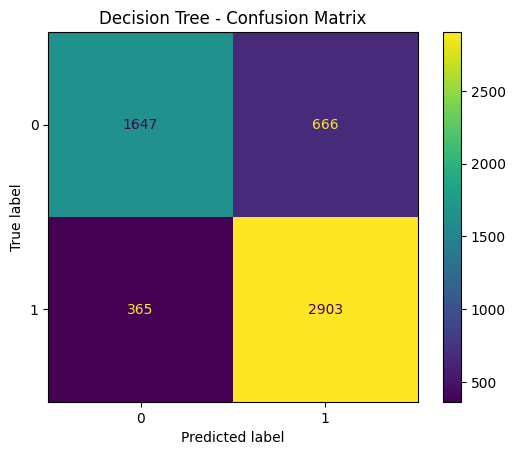

In [25]:
# Evaluation
print("Classification Report - Decision Tree:")
print(classification_report(y_test, y_pred_dt))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_dt))

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(dt_model, X_test_scaled, y_test)
plt.title("Decision Tree - Confusion Matrix")
plt.show()

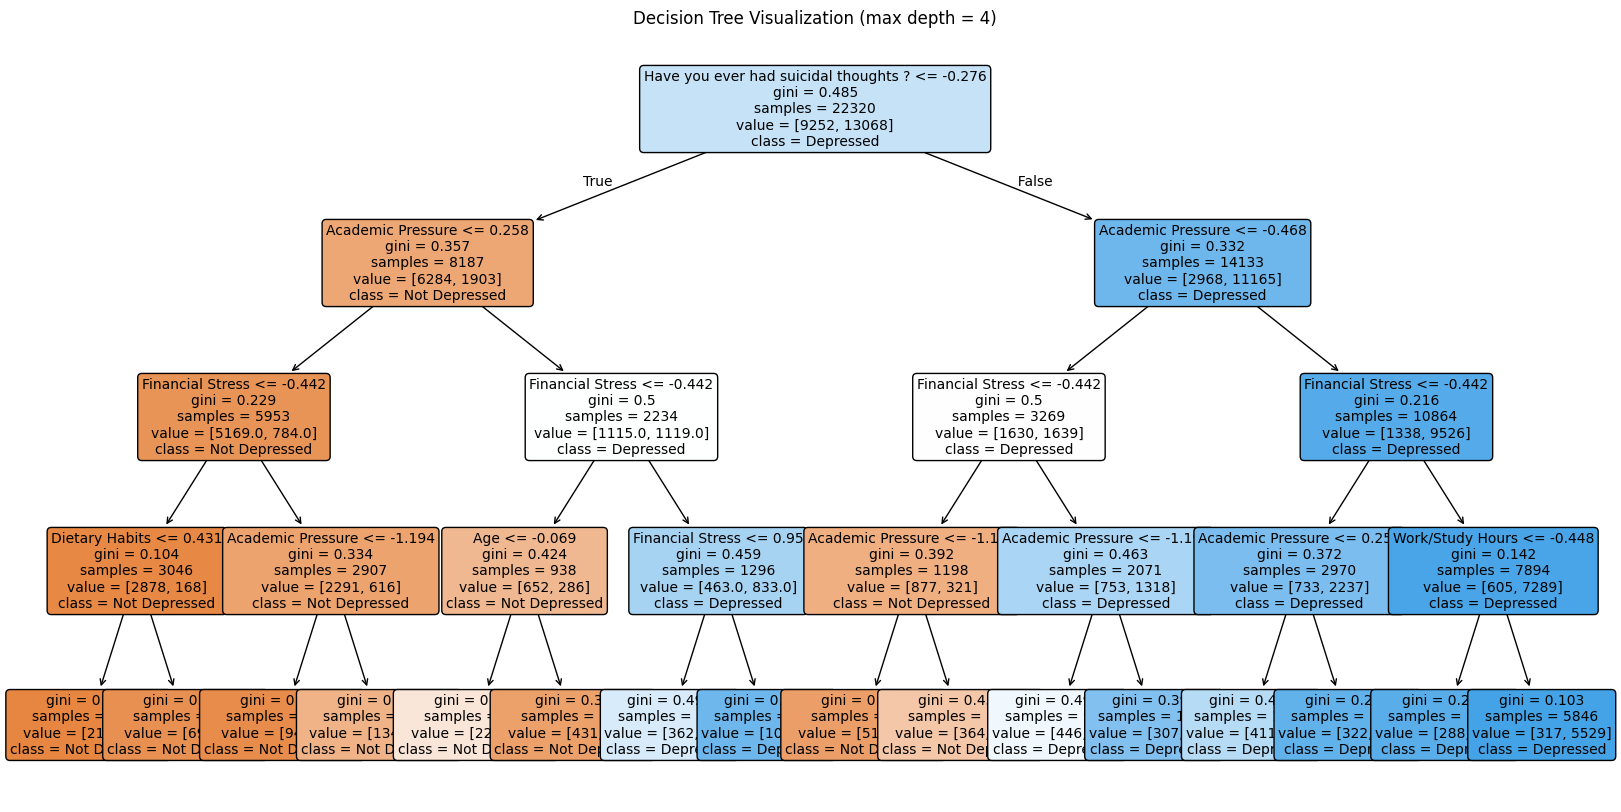

In [26]:
plt.figure(figsize=(20, 10))
plot_tree(dt_model,
          feature_names=X.columns,
          class_names=['Not Depressed', 'Depressed'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree Visualization (max depth = 4)")
plt.show()

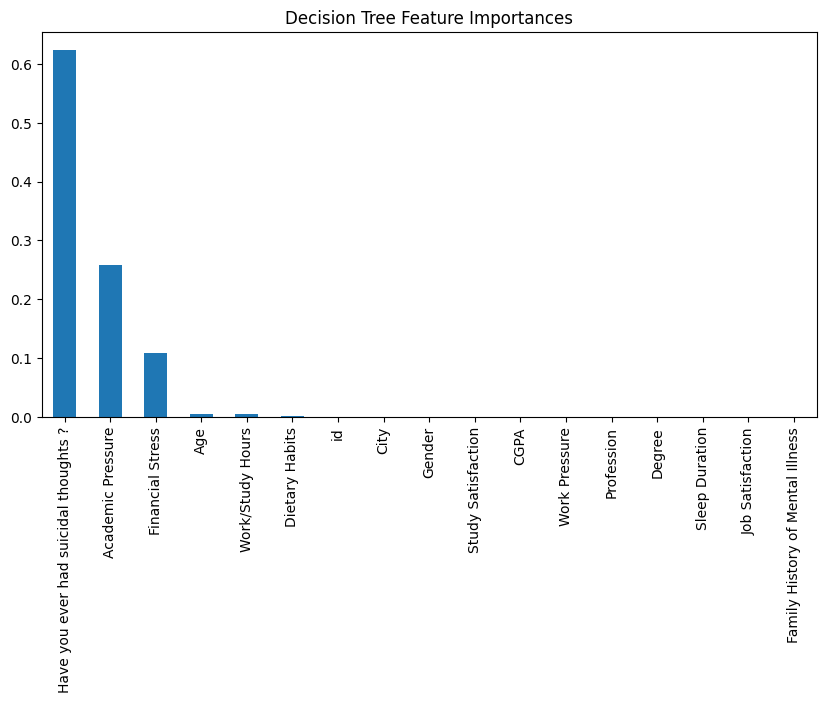

In [27]:
importances = dt_model.feature_importances_
feature_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)
feature_importance.plot(kind='bar', figsize=(10, 5), title='Decision Tree Feature Importances')
plt.show()

The above bar plot shows which features the Decision Tree considered most important, helping to interpret how the model makes decisions.

This portion of the project involves training and evaluating a Decision Tree classifier, a widely used model known for its interpretability and straightforward decision-making process. Including the Decision Tree model adds value by offering a transparent view into how individual features contribute to predicting student depression, especially through the visualization of decision paths.

The model was trained with a maximum depth of 4 to avoid overfitting and to keep the tree structure understandable. Once trained, it was used to predict outcomes on the test set, and its performance was assessed using a classification report and ROC AUC score. The classification report provides detailed performance metrics (precision, recall, and F1-score), and the ROC AUC score quantifies the model’s ability to distinguish between depressed and non-depressed individuals.

The confusion matrix visualizes the number of correct and incorrect predictions, helping to evaluate practical performance and detect potential issues like class imbalance. Furthermore, the decision tree plot gives a hierarchical view of decision rules based on the most informative features, making the model especially useful for explaining results to non-technical stakeholders. This visual interpretability is one of the Decision Tree’s key strengths and justifies its inclusion in the analysis.